In [3]:
import numpy as np
import pandas as pd

In [4]:
# tf.keras에서 fashion_mnist 데이터 다운로드
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# 데이터 전처리
def data_preprocess(images, labels):

    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [6]:
# 전처리 적용
train_images, train_labels = data_preprocess(train_images, train_labels)
test_images, test_labels = data_preprocess(test_images, test_labels)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2024)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)


In [8]:
# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
test_oh_labels = to_categorical(test_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape, test_oh_labels.shape)

after OHE: (51000, 10) (9000, 10) (10000, 10)


### Functional API

In [10]:
INPUT_SIZE = 28

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 방법1
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 방법2
model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

### ▼ 여기 ▼

In [11]:
# Functional API Model을 이용하여 Keras 모델 생성
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# optimizer, loss, metric 적용
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 학습 수행
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 4s 4ms/step - loss: 0.6033 - accuracy: 0.7922 - val_loss: 0.4536 - val_accuracy: 0.8381
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4149 - accuracy: 0.8523 - val_loss: 0.4093 - val_accuracy: 0.8538
Epoch 3/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3801 - accuracy: 0.8650 - val_loss: 0.4086 - val_accuracy: 0.8570
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3527 - accuracy: 0.8722 - val_loss: 0.3726 - val_accuracy: 0.8668
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8788 - val_loss: 0.3597 - val_accuracy: 0.8659
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3187 - accuracy: 0.8843 - val_loss: 0.3458 - val_accuracy: 0.8724
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3053 - accuracy: 0.8891 - val_loss: 0.3315 - val_accuracy: 0.8773
Epoch 

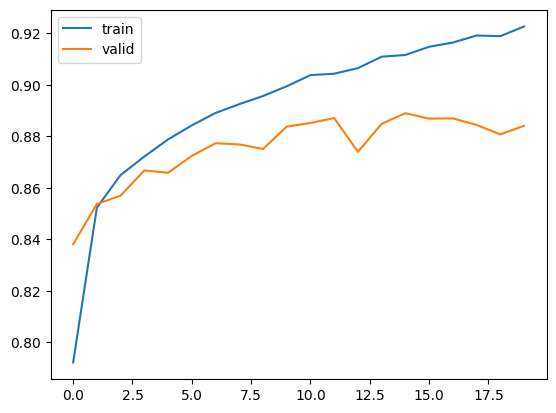

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

In [15]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8767


[0.3537188768386841, 0.8766999840736389]